# Conversion Rate Challenge


## Objectif

Optimiser des taux de conversion est une des tâches les plus importantes d'un data scientist.

C'est pourquoi, nous allons construire un modèle qui va prédire le taux de conversion de clients sur un site web et faire des recommandations à notre équipe marketing pour pouvoir augmenter notre revenu.


## Description du challenge

Nous avons récolté des données à propos d'utilisateurs du site d'une entreprise _anonyme_. Votre projet est de :

1. Créer un modèle de prédiction du taux de conversion (l'utilisateur va-t-il convertir ou non?).

2. Trouver des recommandations à faire pour l'équipe Produit & Marketing afin qu'ils puissent améliorer ce taux de conversion.

## Données

Vous pourrez trouver les données dans votre dossier Projet -- CONVERSION RATE

## Analyse des données

In [148]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings      
warnings.filterwarnings("ignore")


In [149]:
dataset = pd.read_csv("conversion_data.txt",sep=",")

In [150]:
dataset.shape # on a 316200 lignes et 6 colonnes

(316200, 6)

In [151]:
dataset.head() # le varibale target  est converted


,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [152]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [153]:
dataset.describe()#pas de valeurs manquantes ,on a des valeurs aberantes: colonne age

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


## Analyse des données

#### converted ( TARGET )

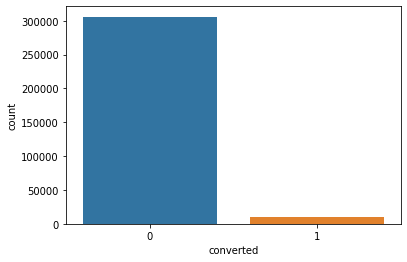

In [154]:
sns.countplot(dataset.converted) ## tres inégale (unbalanced target)

In [155]:
dataset.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [156]:
# Normaliser pour voir les proportions
dataset.converted.value_counts(normalize=True)

0    0.967742
1    0.032258
Name: converted, dtype: float64

####  1- Analyse des variables categorielle 


In [157]:
for col in dataset:
    print(col)
    print(dataset[col].unique())

country
['UK' 'US' 'China' 'Germany']
age
[ 25  23  28  39  30  31  27  29  38  43  24  36  37  33  20  35  17  50
  22  18  34  19  42  32  21  48  40  41  26  45  44  49  46  56  52  54
  51  47  53  60  57  55  59  61  58  62  65  63  66  67  64  68  69 123
  70  73  77  72  79 111]
new_user
[1 0]
source
['Ads' 'Seo' 'Direct']
total_pages_visited
[ 1  5  4  6  2  8  7  3  9 14 10 11 18 15 19 12 13 21 17 23 16 25 26 20
 22 24 27 28 29]
converted
[0 1]


US         0.563226
China      0.242258
UK         0.153226
Germany    0.041290
Name: country, dtype: float64


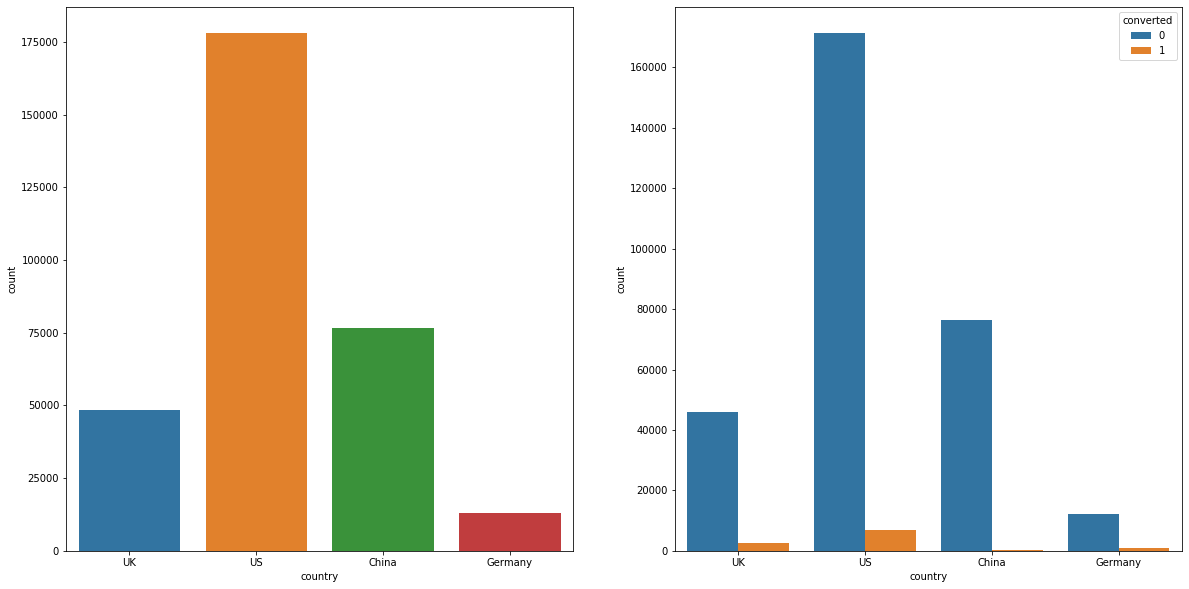

In [158]:
print(dataset.country.value_counts(normalize=True))  
plt.figure(figsize=(20,10))

 #Le site internet est destiné principalement au clients américain

plt.subplot(121) 
sns.countplot(dataset.country)
plt.subplot(122) 
sns.countplot(dataset.country,hue=dataset.converted)

plt.show()

In [159]:
#Calculate conversion rate by country
country_rate = dataset[dataset['converted']==1].country.value_counts()/dataset.country.value_counts(sort=False)

country_rate
#l'Allemagne a un taux de conversion élevé.
#la chine a un taux de conversion faible

China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: country, dtype: float64

1    0.685465
0    0.314535
Name: new_user, dtype: float64


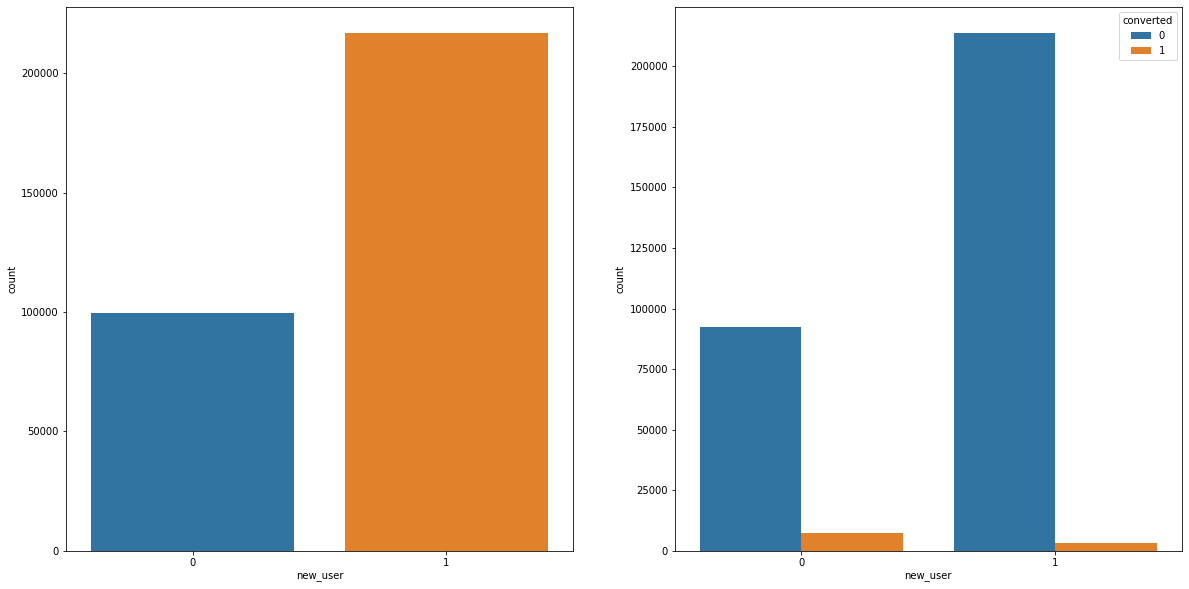

In [160]:
print(dataset.new_user.value_counts(normalize=True)) 

plt.figure(figsize=(20,10))

# bcp de nouveau utilisateur consulte le site
#Le taux de conversion des anciens utilisateurs est plus élevé que celui des nouveaux utilisateurs.



plt.subplot(121) 
sns.countplot(dataset.new_user)
plt.subplot(122) 
sns.countplot(dataset.new_user,hue=dataset.converted)

Seo       0.490323
Ads       0.280645
Direct    0.229032
Name: source, dtype: float64


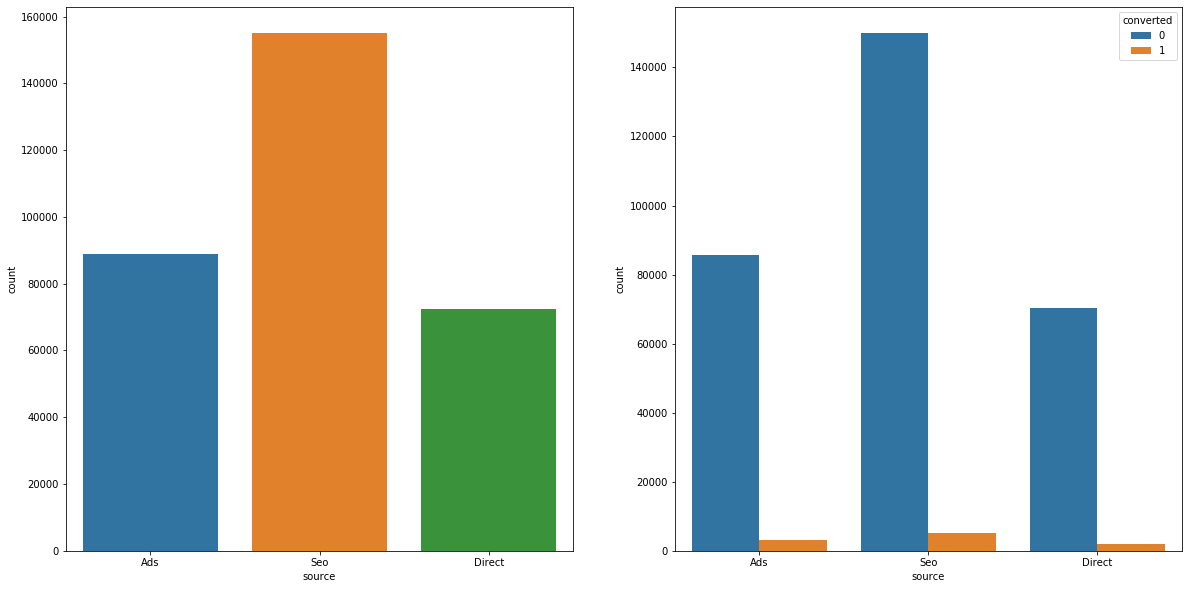

In [161]:
print(dataset.source.value_counts(normalize=True)) # Le canal de marketing la plus utiliser est SEO
# sns.countplot(dataset.source)

plt.figure(figsize=(20,10))

 #Le site internet est destiné principalement au clients américain

plt.subplot(121) 
sns.countplot(dataset.source)
plt.subplot(122) 
sns.countplot(dataset.source,hue=dataset.converted)

####  2- Analyse des variables numeriques 

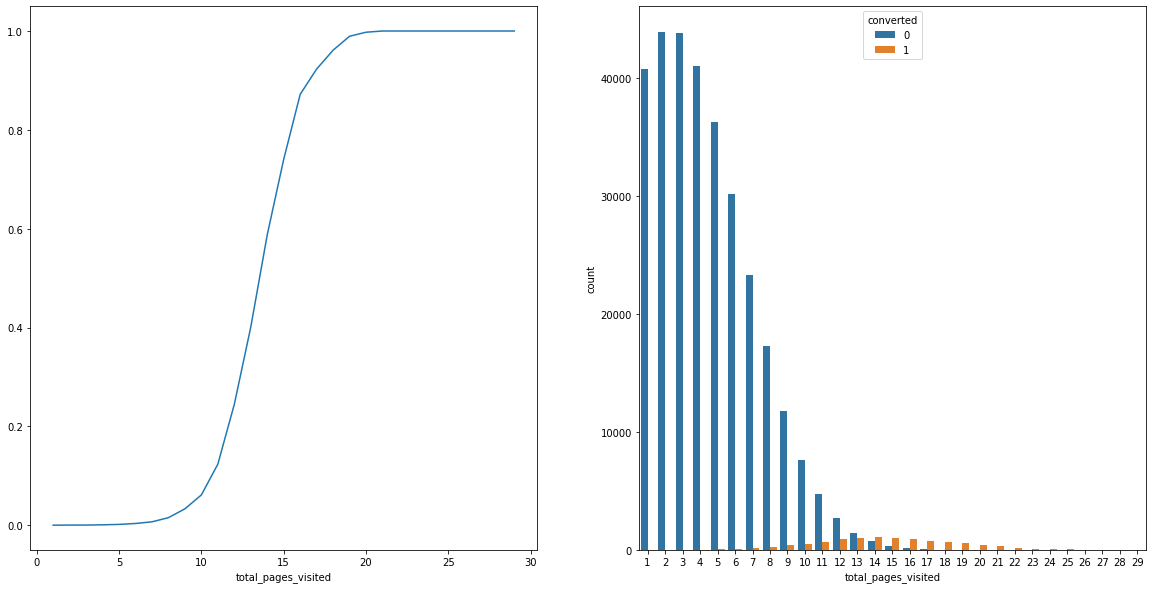

In [162]:
# print(dataset.total_pages_visited.value_counts(normalize=True)) 

plt.figure(figsize=(20,10))



#Le taux de conversion augmente avec le nombre de pages vister(le temps passer sur le site) ,il atteint  80 % a 15 pages visiter..

plt.subplot(121) 
dataset.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.subplot(122) 
sns.countplot(dataset.total_pages_visited,hue=dataset.converted)





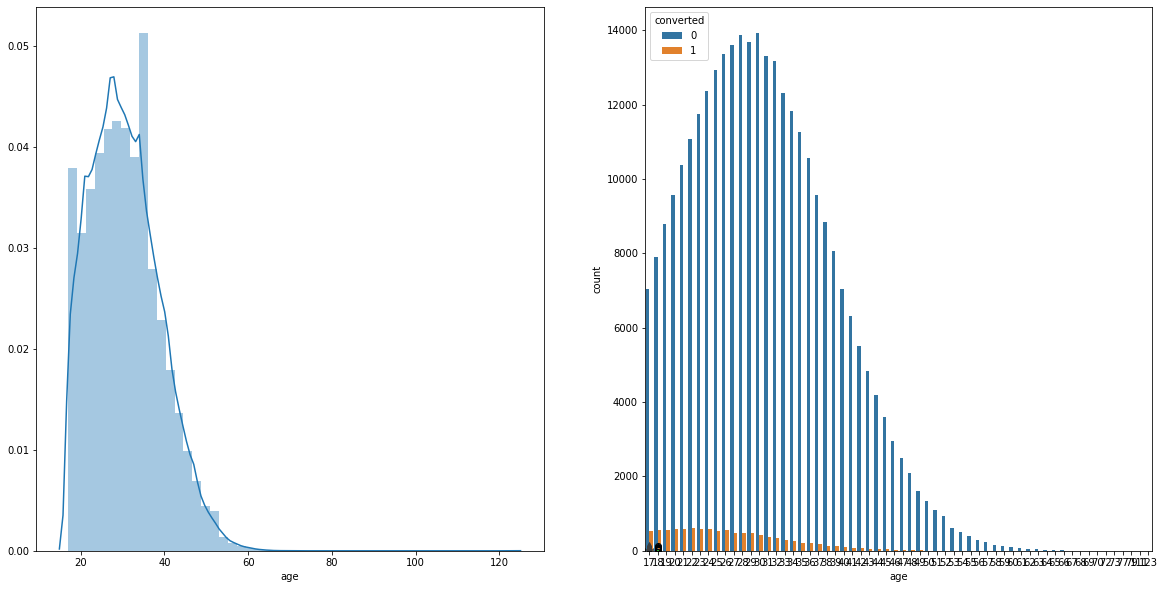

In [163]:
# Le taux de conversion diminue avec l'age...


plt.figure(figsize=(20,10))

plt.subplot(121) 
sns.distplot(dataset['age']); 
plt.subplot(122) 
dataset['age'].plot.box()
sns.boxplot(y=dataset["age"])
sns.countplot(dataset.age,hue=dataset.converted)


In [164]:
# bins = [0, 2, 18, 35, 65, np.inf]
# names = ['<2', '2-18', '18-35', '35-65', '65+']

# df['AgeRange'] = pd.cut(df['Age'], bins, labels=names)

# print(df.dtypes)
#Binning age:

bins_age=[0,20,25,30,35,40,45,np.inf]
                  
category_age=(">20","20-25 ","25-30","30-35","35-40","40-45","45+")

dataset["bin_age"] = pd.cut(dataset["age"],bins_age,labels=category_age)
        



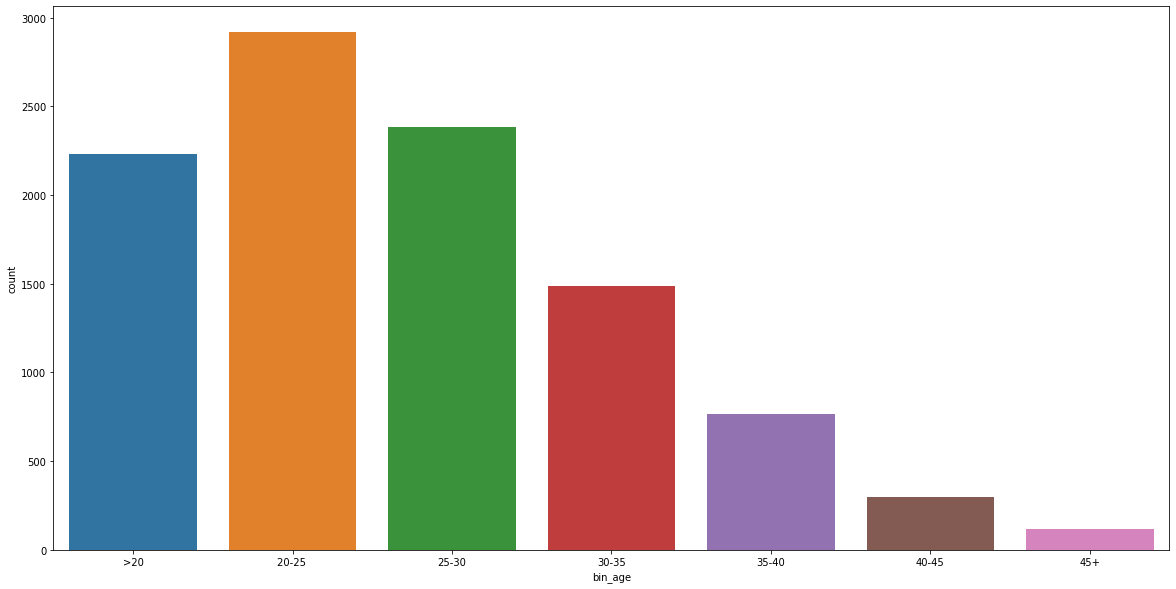

In [165]:
plt.figure(figsize=(20,10))
sns.countplot(dataset[dataset["converted"]==1].bin_age)
#les utilisateurs de moins de 30 ans ont un taux de conversion très élevé

In [166]:
dataset

,country,age,new_user,source,total_pages_visited,converted,bin_age
0,UK,25,1,Ads,1,0,20-25
1,US,23,1,Seo,5,0,20-25
2,US,28,1,Seo,4,0,25-30
3,China,39,1,Seo,5,0,35-40
4,US,30,1,Seo,6,0,25-30
...,...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0,25-30
316196,US,27,1,Direct,6,0,25-30
316197,China,25,0,Ads,4,0,20-25
316198,US,22,0,Seo,4,0,20-25


### 3- La correlation 



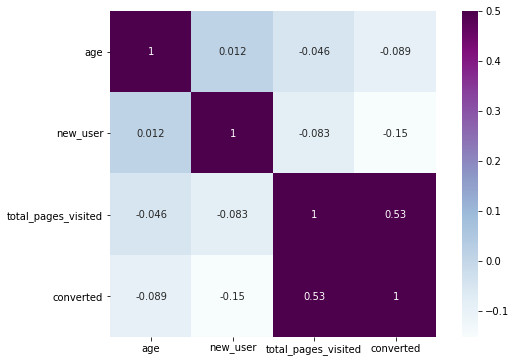

In [167]:
corela = dataset.corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(corela,vmax=.5 ,square=True,annot=True ,cmap="BuPu");


# Preprocessing des données

In [168]:
# Remove  2 outliers 
dataset[dataset.age > 80]

,country,age,new_user,source,total_pages_visited,converted,bin_age
90928,Germany,123,0,Seo,15,1,45+
295581,UK,111,0,Ads,10,1,45+


In [169]:
dataset = dataset[dataset.age < 80]  

In [170]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [171]:
dataset = dataset.drop("bin_age",axis=1) #on enélve la colonne bin_age
dataset = pd.get_dummies(dataset)

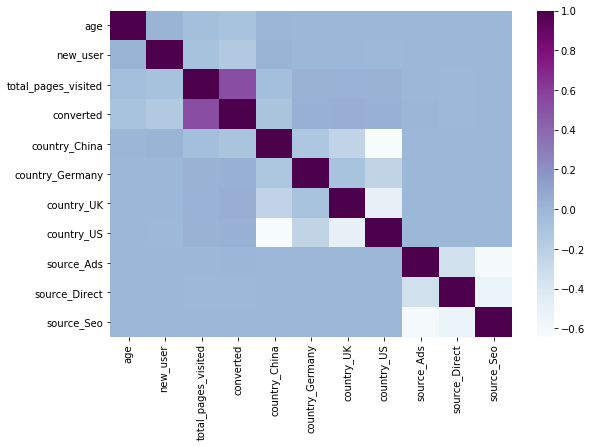

In [172]:
corela = dataset.corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(corela,vmax=1 , cmap="BuPu");

                            Conclusion et recommandation 
                            
Les utilisateurs chinois représente 24 % de notre base de client, Cependant, on a un taux de conversion assez faible de 1 %. Cela indique un problème avec la version chinoise du site Web(...)

Le taux de conversion des utilisateurs allemands est de 6 % alors qu'il constitue 4 % de notre base de client, on peut déduire que ces utilisateurs peuvent être rentables donc il faut augmenter notre base de client allemand.

Les utilisateurs de moins de 30 ans ont un taux de conversion très élevés, les campagnes marketing devrais viser en priorité cette catégorie d'age.

# Machine Learning

### L'objectif

#### Créer un modèle de prédiction du taux de conversion (l'utilisateur va-t-il convertir ou non?).

###### Le variable cible a predire : " converted "  0 : convertis , 1 : non convertis


### Métrique d'évaluation

#####   Le Recall est notre métrique d'évaluation   (dataet déséquilibre  96% de 0 et  3% de 1)



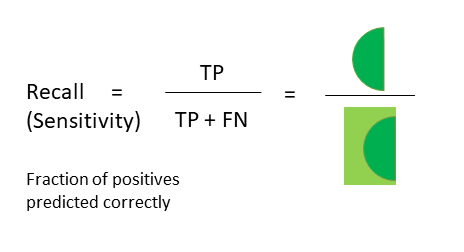


In [141]:
dataset[".columns"]

Index(['age', 'new_user', 'total_pages_visited', 'converted', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo'],
      dtype='object')

In [173]:
dataset[dataset['country_UK']==True]

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
8,29,0,4,0,0,0,1,0,0,1,0
13,23,1,7,0,0,0,1,0,0,1,0
21,20,1,1,0,0,0,1,0,1,0,0
22,27,0,4,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
316179,20,1,4,0,0,0,1,0,0,0,1
316184,26,1,16,1,0,0,1,0,0,0,1
316193,32,1,5,0,0,0,1,0,0,1,0
316194,28,0,8,0,0,0,1,0,0,0,1


In [213]:
dataset1 = dataset[dataset['country_UK']==True]

In [175]:
dataset2 = dataset[dataset['country_China']==True]

In [176]:
dataset3 = dataset[dataset['country_Germany']==True]

In [177]:
dataset4 = dataset[dataset['country_US']==True]

In [214]:
X=dataset1.drop("converted", axis=1)
y=dataset1["converted"]

In [215]:
X.shape

(48449, 10)

In [216]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,stratify = y)



In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
#
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# names = [SVM,DecisionTree,RandomForest,LogisticRegression]
#classifiers = [SVC(), DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression()]



In [219]:
# for i in classifiers:
#     i.fit(X_train, y_train)
#     ypred = i.predict(X_test)
#     print(i.__class__.__name__)
#     print(classification_report(y_test,ypred))

In [220]:
model_lr = LogisticRegression()

In [221]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [222]:
ypred= model_lr.predict(X_test)

In [223]:

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13770
           1       0.85      0.71      0.78       765

    accuracy                           0.98     14535
   macro avg       0.92      0.85      0.88     14535
weighted avg       0.98      0.98      0.98     14535



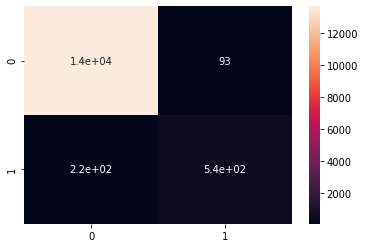

In [224]:
cm = confusion_matrix(y_test, ypred)
cm
sns.heatmap(cm,annot=True)

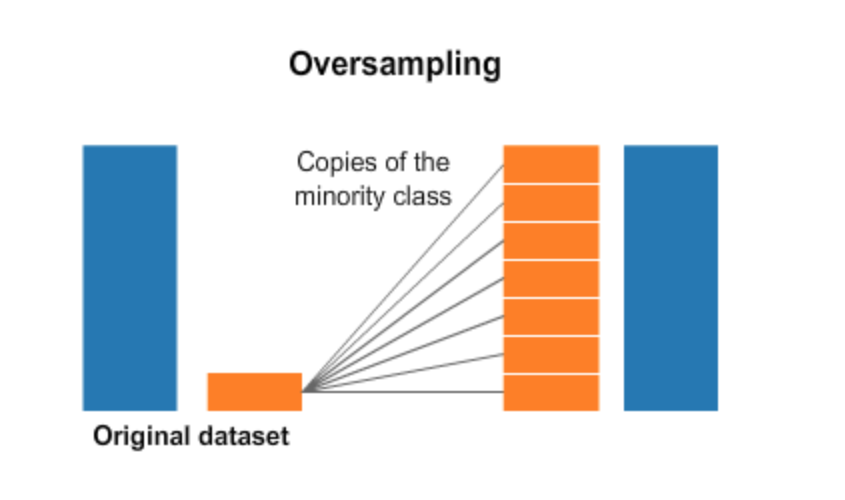


In [225]:
X=dataset.drop(["converted"], axis=1)
y=dataset["converted"]

In [226]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,stratify=y)


In [227]:
from sklearn.utils import resample



# concatenate our training data back together
X = pd.concat([X_train,y_train], axis=1)

# separate minority and majority classes
n_coverted = X[X.converted==0]
y_converted = X[X.converted==1]




In [228]:
X.converted.value_counts()

0    214199
1      7139
Name: converted, dtype: int64

In [229]:
# upsample minority
conv_upsampled = resample(y_converted,
                          replace=True, # sample with replacement
                          n_samples=len(n_coverted), # match number in majority class
                          random_state=42) # reproducible results


In [230]:
conv_upsampled.converted.value_counts()

1    214199
Name: converted, dtype: int64

In [231]:
# combine majority and upsampled minority
upsampled = pd.concat([n_coverted, conv_upsampled])

# check new class counts
upsampled.converted.value_counts()


1    214199
0    214199
Name: converted, dtype: int64

In [232]:
X_train=upsampled.drop("converted", axis=1)
y_train=upsampled["converted"]



In [233]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train =scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [234]:
model_lr_up = LogisticRegression()

In [235]:
model_lr_up.fit(X_train,y_train)

LogisticRegression()

In [236]:
ypred= model_lr_up.predict(X_test)

In [237]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     91801
           1       0.35      0.94      0.51      3059

    accuracy                           0.94     94860
   macro avg       0.67      0.94      0.74     94860
weighted avg       0.98      0.94      0.95     94860



In [238]:
cm = confusion_matrix(y_test, ypred)
cm

array([[86430,  5371],
       [  197,  2862]], dtype=int64)

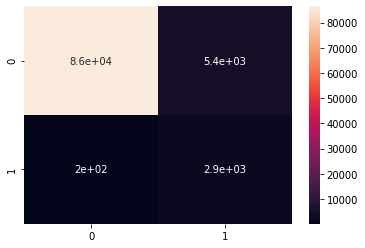

In [239]:
sns.heatmap(cm,annot=True)

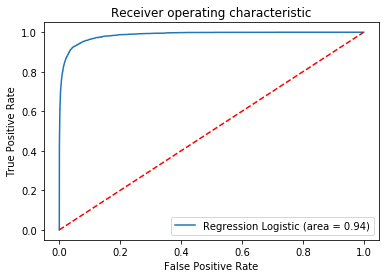

In [240]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_lr_up.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_lr_up.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regression Logistic (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [241]:
# for i in classifiers:
#     i.fit(X_train, y_train)
#     ypred = i.predict(X_test)
#     print(i.__class__.__name__)
#     print(classification_report(y_test,ypred))

In [242]:
logistic = LogisticRegression()

In [243]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [244]:
clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0,scoring="recall")

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
ypred= clf.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,ypred))